<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML13_Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

#Funkcja sigmoid

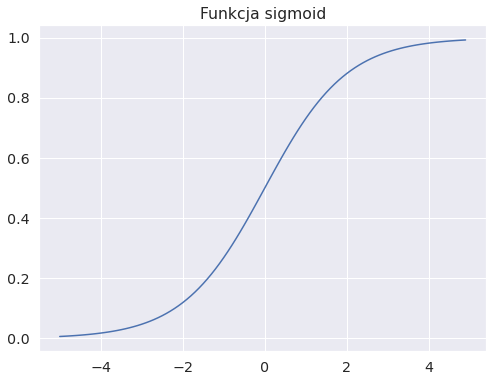

In [4]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

X=np.arange(-5, 5, 0.1)
y=sigmoid(X)

plt.figure(figsize=(8,6))
plt.plot(X,y)
plt.title('Funkcja sigmoid')
plt.show()

#Załadowanie danych

In [5]:
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'Rozmiar danych data: {data.shape}')
print(f'Rozmiar danych target: {target.shape}')

Rozmiar danych data: (569, 30)
Rozmiar danych target: (569,)


#Podział danych na zbiór treningowy i testowy

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


#Przygotowanie danych do modelu

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #Uczenie scalera na zbiorze treningowym

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #skalowanie również bioru testowego (na modelu scalera utworzonego na danych treningowych)
X_train

array([[-0.06, -0.81, -0.03, -0.17, 0.33, 0.49, -0.12, 0.07, -0.57, 0.40, ..., 0.09, -0.77, 0.12, -0.10, 0.40, 0.65, 0.05, 0.39, -0.51, 1.03],
       [-0.76, 0.47, -0.77, -0.71, -0.63, -0.74, -0.46, -0.76, -1.22, 0.34, ..., -0.65, 0.58, -0.67, -0.62, 1.68, -0.21, 0.21, -0.47, -0.13, 0.23],
       [0.47, 0.93, 0.78, 0.36, 1.08, 4.13, 2.97, 2.37, 2.55, 2.57, ..., 0.77, 0.99, 1.12, 0.63, 0.82, 1.70, 1.70, 2.06, 0.60, 0.97],
       [0.15, -1.23, 0.11, -0.00, 1.01, -0.21, -0.23, 0.45, -0.61, -0.23, ..., -0.07, -1.41, -0.10, -0.21, 0.12, -0.67, -0.64, -0.10, -0.49, -0.33],
       [3.99, -0.18, 4.01, 5.26, 1.32, 0.96, 3.00, 2.94, -0.62, -1.07, ..., 2.48, -1.16, 2.46, 2.88, -0.79, -0.65, 0.25, 0.71, -2.03, -1.57],
       [-0.32, 0.07, -0.35, -0.39, -0.35, -0.48, -0.89, -0.71, 0.18, 0.09, ..., -0.35, -0.20, -0.33, -0.42, -0.47, -0.56, -0.96, -0.76, 0.66, -0.37],
       [-0.06, 1.23, 0.05, -0.14, 1.47, 1.29, 0.63, 0.52, 1.73, 1.34, ..., -0.03, 1.20, -0.01, -0.14, 2.10, 0.93, 0.34, 0.60, 1.20, 1.

#Dopasowanie modelu

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#Predykcja na podstawie modelu

In [12]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [14]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.03, 0.97],
       [1.00, 0.00],
       [0.10, 0.90],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.06, 0.94],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.51, 0.49],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.02, 0.98],
       [1.00, 0.00],
       [0.07, 0.93],
       [0.00, 1.00],
       [0.12, 0.88],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00]])

#Ocena modelu

Accuracy: 0.986013986013986


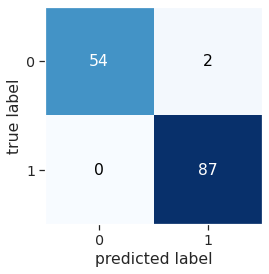

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [16]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

